In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("./ClosedEyes/s0037_06011_1_1_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

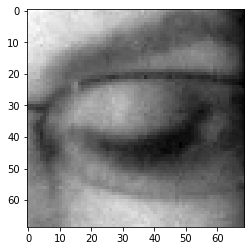

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(69, 69)

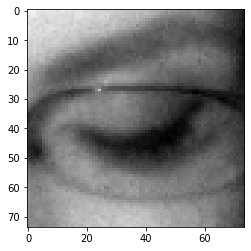

In [5]:
dataDirectory = "."
classes = ['ClosedEyes', 'OpenEyes']
for category in classes:
    path = os.path.join(dataDirectory, category)
    i = 0
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

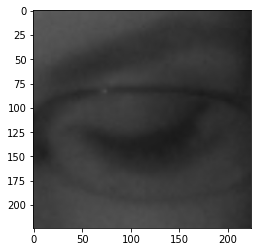

In [6]:
img_size = 224
new_array = cv2.resize(backToRGB, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all images and converting them into an array for data and labels

In [7]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(dataDirectory, category)
        class_num = classes.index(category)
        i = 0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backToRGB, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                    print(e)
            print('i = ', i)
            i = i+1
            if i == 1000:
                break

In [9]:
print(len(training_data))

2000


In [10]:
import random

random.shuffle(training_data)

In [11]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [12]:
x.shape

(2000, 224, 224, 3)

In [13]:
# Normalize data
x = x/255.0

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

# Deep learning model for training - Training Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [20]:
base_input = model.layers[0].input

In [21]:
#drop the last 3 layers
base_output = model.layers[-4].output

In [22]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [25]:
new_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
new_model.fit(x, Y, epochs = 1, validation_split = 0.1) ## training

57/57 [==============================] - 338s 3s/step - loss: 0.3231 - accuracy: 0.8931 - val_loss: 7.6703 - val_accuracy: 0.5800


In [27]:
new_model.save('mymodel.h5')

# Checking the network for predictions

In [28]:
img_array = cv2.imread('./ClosedEyes/s0014_03666_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img_array)
backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backToRGB, (img_size, img_size))

In [29]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [30]:
X_input.shape

(1, 224, 224, 3)

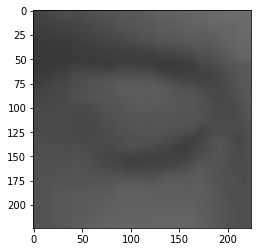

In [31]:
plt.imshow(new_array)

In [32]:
# Usin sklearn to normalize data
X_input = X_input/255.0

In [33]:
prediction = new_model.predict(X_input)
prediction

array([[1.620103e-13]], dtype=float32)

# Check on unknown images

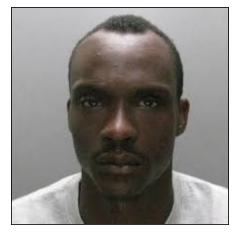

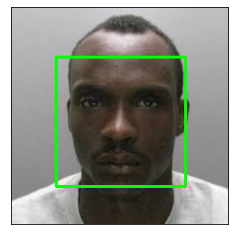

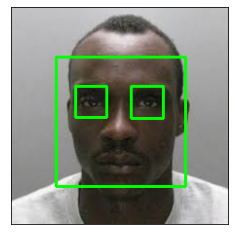

# Cropping the Eye image

[[ 3  5 24 24]]
[[ 2  4 25 25]]


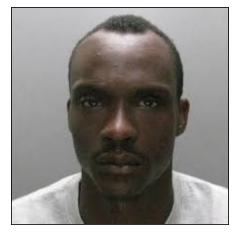

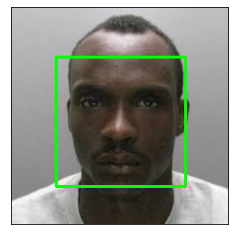

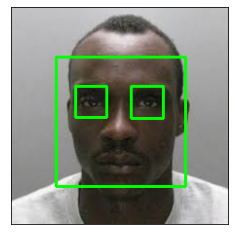

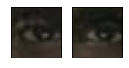

In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('person.jpg')
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
plt.figure(figsize=(2, 2), facecolor='white')
i = 1
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    if len(eyes) == 0:
        print('eyes are not detected')
    else:
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
        for ex, ey, ew, eh in eyes:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
            plt.subplot(1,2,i)
            i+=1
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

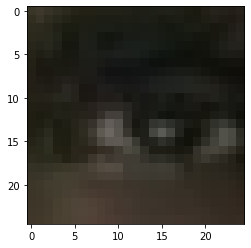

In [42]:
eyes_roi.shape

(64, 64, 3)

In [43]:
final_img = cv2.resize(eyes_roi, (224, 224))
final_img = np.expand_dims(final_img, axis = 0)

In [44]:
# Normalize data
final_img = final_img/255.0

In [45]:
final_img.shape

(1, 224, 224, 3)

In [46]:
new_model.predict(final_img)

array([[0.9999804]], dtype=float32)

# Realtime Video Demo
## First detect that eyes are closed on open

In [47]:
cap = cv2.VideoCapture(1)

#check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')

    
while True:
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print('eyes are not detected')
        else:
            print('no of eyes are ' + len(eyes))
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
    # Usin sklearn to normalize data
    final_img = final_img/255.0
    predictions = new_model.predict(final_image)
    if predictions > 0:
        status = 'Open Eyes'
    else:
        status = 'Closed Eyes'

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw a rectangle around the face

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX


    # Use putText() method for
    # Inserting text on video
    cv2.putText(frame, status, (50, 50), font, 3, (255, 0, 0), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

TypeError: can only concatenate str (not "int") to str